In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/bottle-updated.csv.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/bottle-updated.csv.zip -d /content

!rm /content/bottle-updated.csv.zip

replace /content/bottle-updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/bottle-updated.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  864863 non-null  int64  
 1   Depthm      864863 non-null  int64  
 2   T_degC      853900 non-null  float64
 3   Salnty      817509 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 26.4 MB


In [ ]:
dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


Data Cleaning

In [ ]:
# Drop kolom yang tidak digunakan

dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  864863 non-null  int64  
 1   T_degC  853900 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [ ]:
# Replace nilai "?" dengan Nan

dataset.replace("?", np.nan, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

In [ ]:
# Replace Nan dengan average

avg_1 = dataset['T_degC'].astype('float').mean(axis=0)
dataset['T_degC'].replace(np.nan, avg_1, inplace=True)

# Bila data Nan yang harus di replace banyak
# for i in dataset.columns:
#     if dataset[i].isnull().sum() > 0:
#         dataset[i].fillna(dataset[i].mean(), inplace=True)

In [ ]:
# Menghapus nilai Nan pada Salnty, karena Salnty yang dicari regresinya

dataset.dropna(subset=['Salnty'], axis=0, inplace=True)

In [ ]:
dataset.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaae17c550>,
      dtype=object)

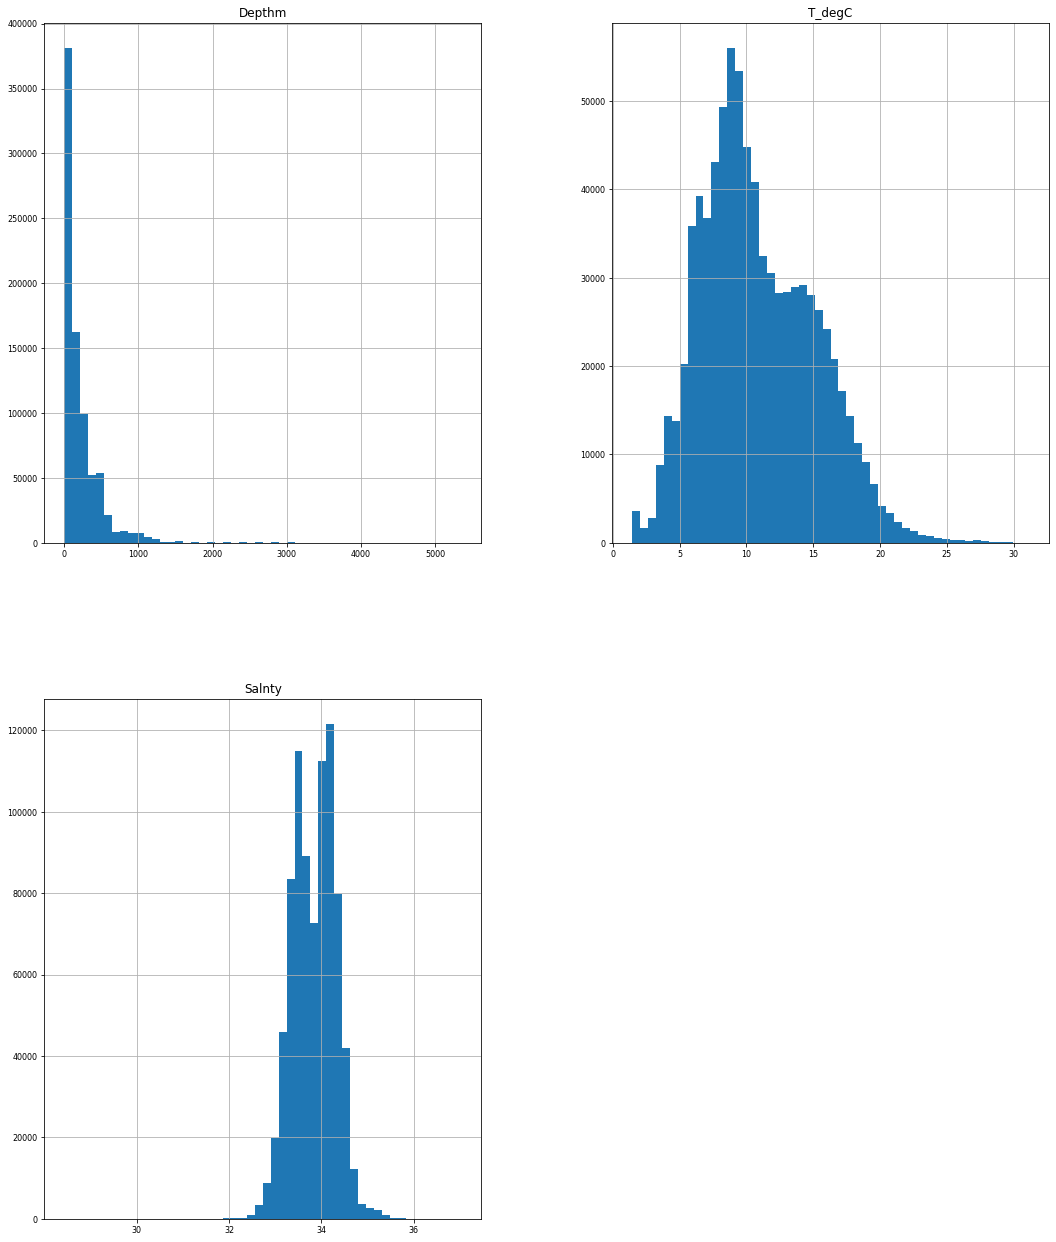

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# dataset.corr()['Salnty'][:-1]

In [ ]:
corr = dataset.corr()

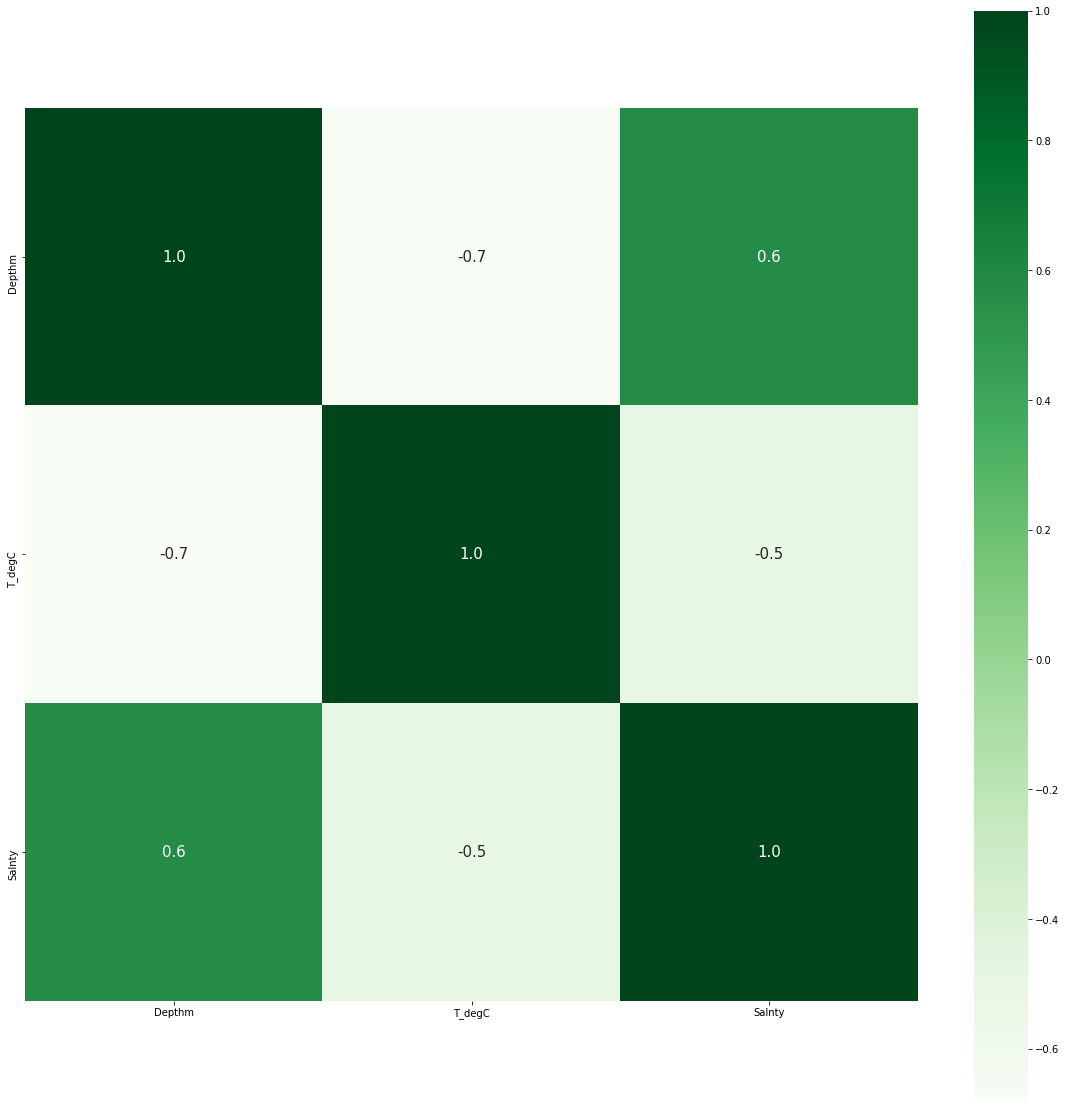

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

## Feature Engineering

In [ ]:
label = dataset['Salnty']
features = dataset.drop(['Salnty'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.25, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) :  0.6436007810969308
MAE (Mean Absolute Error) :  0.5597834805603158
r^2 score :  0.3541970327535493
RMSE (Root Mean Squared Error :  0.8022473316234406


## Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_baseline = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 90s 1ms/step - loss: 0.3539 - val_loss: 0.3337
Epoch 2/50
76642/76642 [==============================] - 71s 921us/step - loss: 0.3398 - val_loss: 0.3415
Epoch 3/50
76642/76642 [==============================] - 73s 954us/step - loss: 0.3394 - val_loss: 0.3312
Epoch 4/50
76642/76642 [==============================] - 72s 939us/step - loss: 0.3391 - val_loss: 0.3382
Epoch 5/50
76642/76642 [==============================] - 73s 949us/step - loss: 0.3391 - val_loss: 0.3317
Epoch 6/50
76642/76642 [==============================] - 111s 1ms/step - loss: 0.3389 - val_loss: 0.3434
Epoch 7/50
76642/76642 [==============================] - 97s 1ms/step - loss: 0.3388 - val_loss: 0.3304
Epoch 8/50
76642/76642 [==============================] - 87s 1ms/step - loss: 0.3387 - val_loss: 0.3408
Epoch 9/50
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3385 - val_loss: 0.3317
Epoch 10/50
76642/76642 [=====================

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.30392366673248417
MAE (Mean Absolute Error) :  0.35624548228640274
r^2 score :  0.6950364083496983
RMSE (Root Mean Squared Error :  0.5512927232718423


In [ ]:
history_baseline_dataframe = pd.DataFrame(history_baseline.history)
history_baseline_dataframe['epoch'] = history_baseline.epoch
history_baseline_dataframe

,loss,val_loss,epoch
0,0.353931,0.333655,0
1,0.339784,0.341464,1
2,0.339432,0.331248,2
3,0.339058,0.338174,3
4,0.339080,0.331743,4
5,0.338923,0.343369,5
6,0.338789,0.330380,6
7,0.338750,0.340758,7
8,0.338530,0.331683,8
9,0.338452,0.336017,9


In [ ]:
history_baseline_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
48,0.303578,0.298021,48
42,0.303738,0.298357,42
43,0.303762,0.298719,43
45,0.303570,0.299044,45
40,0.303757,0.299352,40
33,0.306248,0.299419,33
34,0.304415,0.299452,34
39,0.303937,0.299940,39
41,0.303738,0.299967,41
35,0.304113,0.300421,35


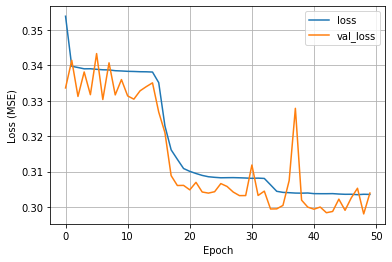

In [ ]:
plot_loss(history_baseline)

## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

NameError: ignored

In [ ]:
history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 83s 1ms/step - loss: 0.3162 - val_loss: 0.2996
Epoch 2/50
76642/76642 [==============================] - 104s 1ms/step - loss: 0.3052 - val_loss: 0.2991
Epoch 3/50
76642/76642 [==============================] - 86s 1ms/step - loss: 0.3047 - val_loss: 0.2994
Epoch 4/50
76642/76642 [==============================] - 81s 1ms/step - loss: 0.3044 - val_loss: 0.3172
Epoch 5/50
76642/76642 [==============================] - 83s 1ms/step - loss: 0.3042 - val_loss: 0.2985
Epoch 6/50
76642/76642 [==============================] - 88s 1ms/step - loss: 0.3041 - val_loss: 0.3028
Epoch 7/50
76642/76642 [==============================] - 104s 1ms/step - loss: 0.3035 - val_loss: 0.3029
Epoch 8/50
76642/76642 [==============================] - 89s 1ms/step - loss: 0.3024 - val_loss: 0.2969
Epoch 9/50
76642/76642 [==============================] - 92s 1ms/step - loss: 0.3020 - val_loss: 0.2998
Epoch 10/50
76642/76642 [============================

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.2974411210794537
MAE (Mean Absolute Error) :  0.3520899789727319
r^2 score :  0.7015411351011207
RMSE (Root Mean Squared Error :  0.5453816288430091


In [ ]:
history_deeper_dataframe = pd.DataFrame(history_deeper.history)
history_deeper_dataframe['epoch'] = history_deeper.epoch
history_deeper_dataframe

,loss,val_loss,epoch
0,0.316217,0.299572,0
1,0.305243,0.299050,1
2,0.304745,0.299409,2
3,0.304363,0.317220,3
4,0.304230,0.298481,4
5,0.304109,0.302836,5
6,0.303494,0.302902,6
7,0.302387,0.296879,7
8,0.302047,0.299786,8
9,0.301931,0.297626,9


In [ ]:
history_deeper_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
46,0.298229,0.292921,46
45,0.298184,0.292946,45
48,0.298104,0.293045,48
32,0.298405,0.293284,32
43,0.298250,0.293433,43
38,0.298245,0.293503,38
34,0.298371,0.293528,34
44,0.298196,0.293576,44
31,0.298431,0.293588,31
17,0.299208,0.293654,17


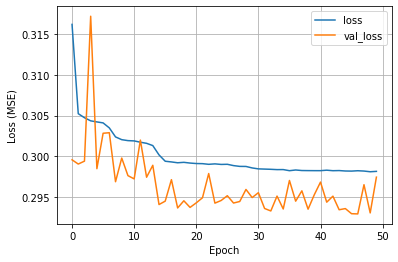

In [ ]:
plot_loss(history_deeper)

## Wider Model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_wider = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3454 - val_loss: 0.3385
Epoch 2/100
76642/76642 [==============================] - 83s 1ms/step - loss: 0.3258 - val_loss: 0.3111
Epoch 3/100
76642/76642 [==============================] - 88s 1ms/step - loss: 0.3138 - val_loss: 0.3053
Epoch 4/100
76642/76642 [==============================] - 90s 1ms/step - loss: 0.3113 - val_loss: 0.3051
Epoch 5/100
76642/76642 [==============================] - 74s 967us/step - loss: 0.3104 - val_loss: 0.3046
Epoch 6/100
76642/76642 [==============================] - 73s 955us/step - loss: 0.3096 - val_loss: 0.3042
Epoch 7/100
76642/76642 [==============================] - 72s 945us/step - loss: 0.3085 - val_loss: 0.3021
Epoch 8/100
76642/76642 [==============================] - 76s 995us/step - loss: 0.3055 - val_loss: 0.2987
Epoch 9/100
76642/76642 [==============================] - 78s 1ms/step - loss: 0.3019 - val_loss: 0.2962
Epoch 10/100
76642/76642 [============

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.29530175872464637
MAE (Mean Absolute Error) :  0.34914337859328143
r^2 score :  0.7036878176368305
RMSE (Root Mean Squared Error :  0.5434167449799889


In [ ]:
history_wider_dataframe = pd.DataFrame(history_wider.history)
history_wider_dataframe['epoch'] = history_wider.epoch
history_wider_dataframe

,loss,val_loss,epoch
0,0.345397,0.338490,0
1,0.325800,0.311123,1
2,0.313788,0.305309,2
3,0.311279,0.305120,3
4,0.310371,0.304598,4
...,...,...,...
95,0.299469,0.294284,95
96,0.299337,0.294686,96
97,0.299374,0.294145,97
98,0.299312,0.295220,98


In [ ]:
history_wider_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
75,0.299376,0.293845,75
49,0.299436,0.293898,49
36,0.299561,0.293900,36
50,0.299484,0.293989,50
44,0.299530,0.294133,44
...,...,...,...
3,0.311279,0.305120,3
2,0.313788,0.305309,2
70,0.299363,0.305677,70
1,0.325800,0.311123,1


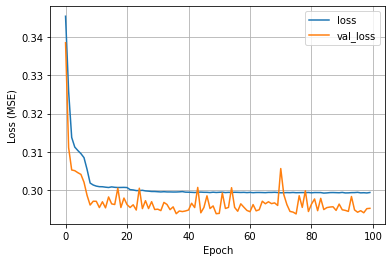

In [ ]:
plot_loss(history_wider)

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 63s 824us/step - loss: 0.3494 - val_loss: 0.3249
Epoch 2/100
76642/76642 [==============================] - 65s 851us/step - loss: 0.3234 - val_loss: 0.3087
Epoch 3/100
76642/76642 [==============================] - 89s 1ms/step - loss: 0.3224 - val_loss: 0.3073
Epoch 4/100
76642/76642 [==============================] - 74s 968us/step - loss: 0.3246 - val_loss: 0.3208
Epoch 5/100
76642/76642 [==============================] - 73s 953us/step - loss: 0.3290 - val_loss: 0.3115
Epoch 6/100
76642/76642 [==============================] - 71s 922us/step - loss: 0.3247 - val_loss: 0.3139
Epoch 7/100
76642/76642 [==============================] - 63s 822us/step - loss: 0.3237 - val_loss: 0.3176
Epoch 8/100
76642/76642 [==============================] - 64s 830us/step - loss: 0.3242 - val_loss: 0.3220
Epoch 9/100
76642/76642 [==============================] - 71s 923us/step - loss: 0.3251 - val_loss: 0.3140
Epoch 10/100
76642/76642 [====

In [ ]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.29972437862672546
MAE (Mean Absolute Error) :  0.35515019740445875
r^2 score :  0.6992500650118291
RMSE (Root Mean Squared Error :  0.5474708929493197


In [ ]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
63,0.307296,0.296069,63
56,0.305977,0.296089,56
82,0.305958,0.296361,82
81,0.305682,0.296832,81
74,0.305992,0.296964,74
...,...,...,...
29,0.319054,0.329315,29
27,0.345982,0.332354,27
64,0.305808,0.335860,64
34,0.311344,0.337705,34


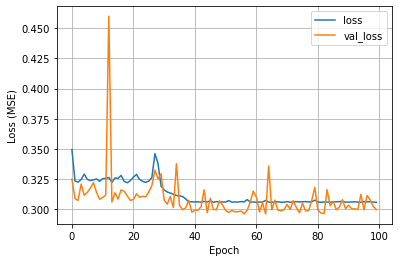

In [ ]:
plot_loss(history_tuned)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
76642/76642 [==============================] - 75s 984us/step - loss: 0.3423 - val_loss: 0.3101
Epoch 2/100
76642/76642 [==============================] - 77s 1ms/step - loss: 0.3141 - val_loss: 0.3052
Epoch 3/100
76642/76642 [==============================] - 74s 963us/step - loss: 0.3131 - val_loss: 0.3057
Epoch 4/100
76642/76642 [==============================] - 74s 960us/step - loss: 0.3126 - val_loss: 0.3150
Epoch 5/100
76642/76642 [==============================] - 90s 1ms/step - loss: 0.3117 - val_loss: 0.3045
Epoch 6/100
76642/76642 [==============================] - 72s 938us/step - loss: 0.3121 - val_loss: 0.3058
Epoch 7/100
76642/76642 [==============================] - 72s 942us/step - loss: 0.3121 - val_loss: 0.3058
Epoch 8/100
76642/76642 [==============================] - 66s 858us/step - loss: 0.3119 - val_loss: 0.3041
Epoch 9/100
76642/76642 [==============================] - 65s 851us/step - loss: 0.3120 - val_loss: 0.3167
Epoch 10/100
76642/76642 [======

In [ ]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)

print("MSE (Mean Squared Error) : ", mse)
print("MAE (Mean Absolute Error) : ", mae)
print("r^2 score : ", r2)
print('RMSE (Root Mean Squared Error : ', np.sqrt(mean_squared_error(label_test, predictions))) 

MSE (Mean Squared Error) :  0.3354113772135381
MAE (Mean Absolute Error) :  0.3811095680766702
r^2 score :  0.6634409574774918
RMSE (Root Mean Squared Error :  0.5791471118925986


In [ ]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
51,0.310867,0.297727,51
52,0.311650,0.297851,52
47,0.309189,0.297926,47
43,0.308570,0.298133,43
42,0.308737,0.298149,42
...,...,...,...
79,0.330006,0.371609,79
63,0.322788,0.383257,63
66,0.323986,0.392961,66
78,0.328789,0.402266,78


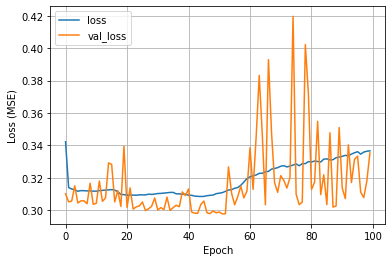

In [ ]:
plot_loss(history_rmsprop)

## Kesimpulan

Dari data di atas, didapatkan hasil:

- Normal Linear Regression
MSE (Mean Squared Error) :  0.6436007810969308
MAE (Mean Absolute Error) :  0.5597834805603158
r^2 score :  0.3541970327535493
RMSE (Root Mean Squared Error :  0.8022473316234406

- Baseline Model
MSE (Mean Squared Error) :  0.30392366673248417
MAE (Mean Absolute Error) :  0.35624548228640274
r^2 score :  0.6950364083496983
RMSE (Root Mean Squared Error :  0.5512927232718423

- Deeper Model
MSE (Mean Squared Error) :  0.2974411210794537
MAE (Mean Absolute Error) :  0.3520899789727319
r^2 score :  0.7015411351011207
RMSE (Root Mean Squared Error :  0.5453816288430091

- Wider Model Adam
MSE (Mean Squared Error) :  0.29530175872464637
MAE (Mean Absolute Error) :  0.34914337859328143
r^2 score :  0.7036878176368305
RMSE (Root Mean Squared Error :  0.5434167449799889

- Wider Model SGD
MSE (Mean Squared Error) :  0.29972437862672546
MAE (Mean Absolute Error) :  0.35515019740445875
r^2 score :  0.6992500650118291
RMSE (Root Mean Squared Error :  0.5474708929493197

- Wider Model Rmsprop
MSE (Mean Squared Error) :  0.3354113772135381
MAE (Mean Absolute Error) :  0.3811095680766702
r^2 score :  0.6634409574774918
RMSE (Root Mean Squared Error :  0.5791471118925986

Dapat disimpulkan bahwa algoritma yang cocok untuk dataset bottle adalah Wider Model Adam walaupun nilai r^2 score dan MSE masih kurang baik, ada kemungkinan hal ini dapat diperbaiki dengan penambahan jumlah neuron pada model tersebut dan bila di lihat kembali pada posisi kedua terbaik, yaitu Wider Model Adam. Hal ini bisa diartikan, hasil terbaik bisa ditemukan dengan melebarkan layer dan memperdalam jumlah layer nya. Serta, untuk optimizernya dapat digunakan Adam atau SGD.